In [1]:
import os
import shutil
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

import plotly
from fbprophet import Prophet

In [2]:
df_sales = pd.read_csv('sales_train_v2.csv')

In [3]:
df_sales_fbprophet = df_sales.loc[(df_sales['item_cnt_day']>0)&
                                (df_sales['item_id']==969) &
                               (df_sales['date_block_num']<34)]

df_sales_fbprophet = df_sales_fbprophet.drop(['date_block_num','shop_id','item_id','item_price'],axis=1)
df_sales_fbprophet

,date,item_cnt_day
1706796,14.06.2014,1.0
1706797,15.06.2014,1.0
1706798,22.06.2014,2.0
1707992,11.06.2014,1.0
1707993,12.06.2014,1.0
...,...,...
2864963,12.09.2015,2.0
2872078,14.09.2015,1.0
2885178,16.10.2015,1.0
2905122,09.10.2015,1.0


In [4]:
df_sales_fbprophet = df_sales_fbprophet.rename(columns={"date": "ds", "item_cnt_day": "y"})
df_sales_fbprophet

,ds,y
1706796,14.06.2014,1.0
1706797,15.06.2014,1.0
1706798,22.06.2014,2.0
1707992,11.06.2014,1.0
1707993,12.06.2014,1.0
...,...,...
2864963,12.09.2015,2.0
2872078,14.09.2015,1.0
2885178,16.10.2015,1.0
2905122,09.10.2015,1.0


In [5]:
m = Prophet(daily_seasonality=False, yearly_seasonality=True)
m.fit(df_sales_fbprophet)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [6]:
# predict 53 days into the future so we have a full month in January
future = m.make_future_dataframe(periods=53)
future.tail()

,ds
327,2016-01-27
328,2016-01-28
329,2016-01-29
330,2016-01-30
331,2016-01-31


In [7]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
327,2016-01-27,0.922227,0.533058,1.293556
328,2016-01-28,1.019913,0.632607,1.396661
329,2016-01-29,0.902597,0.513812,1.255029
330,2016-01-30,1.022224,0.658715,1.412397
331,2016-01-31,0.978293,0.608722,1.356802


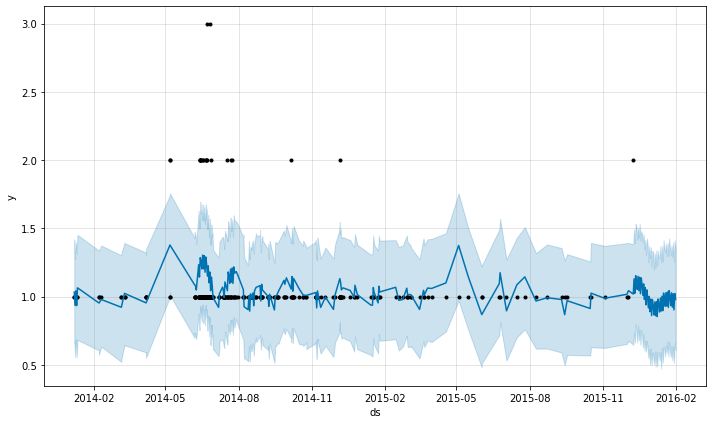

In [8]:
fig1 = m.plot(forecast)